### 필수과제2

In [2]:
import pandas as pd
import datetime

In [3]:
crime= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crime.csv')

In [4]:
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])
crime = crime.set_index('REPORTED_DATE')

In [5]:
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [6]:
crime['IS_CRIME'].resample('D').sum()

REPORTED_DATE
2012-01-02     34
2012-01-03     64
2012-01-04     89
2012-01-05     94
2012-01-06     96
             ... 
2017-09-25    166
2017-09-26    192
2017-09-27    200
2017-09-28    169
2017-09-29     26
Freq: D, Name: IS_CRIME, Length: 2098, dtype: int64

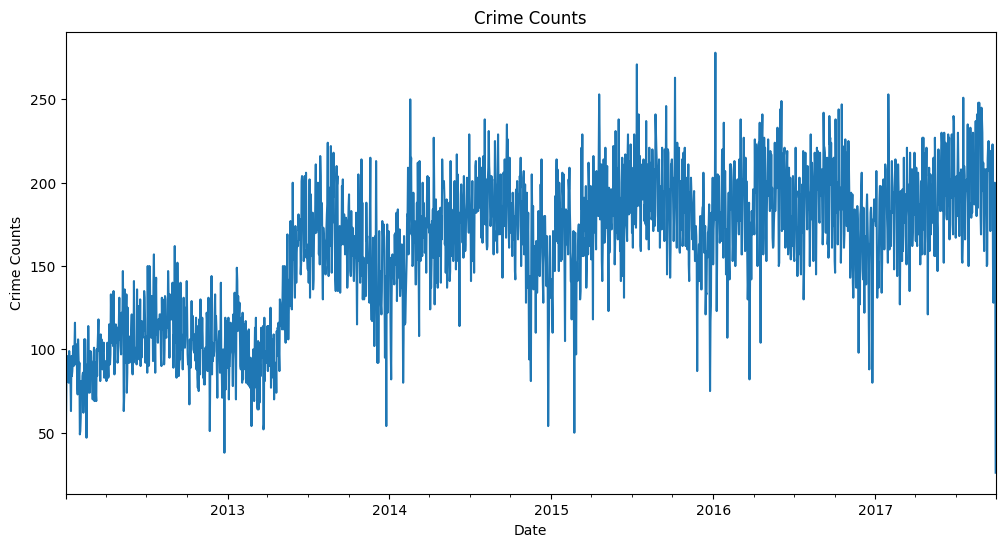

In [7]:
import matplotlib.pyplot as plt

crime_counts = crime['IS_CRIME'].resample('D').sum()

# 전체 범죄율 그래프
plt.figure(figsize=(12, 6))
crime_counts.plot()
plt.title('Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Counts')
plt.show()

In [8]:
#범죄유형 목록
id = crime['OFFENSE_CATEGORY_ID'].unique()
id

array(['traffic-accident', 'all-other-crimes', 'public-disorder',
       'aggravated-assault', 'other-crimes-against-persons', 'larceny',
       'theft-from-motor-vehicle', 'burglary', 'drug-alcohol',
       'auto-theft', 'sexual-assault', 'robbery', 'white-collar-crime',
       'arson', 'murder'], dtype=object)

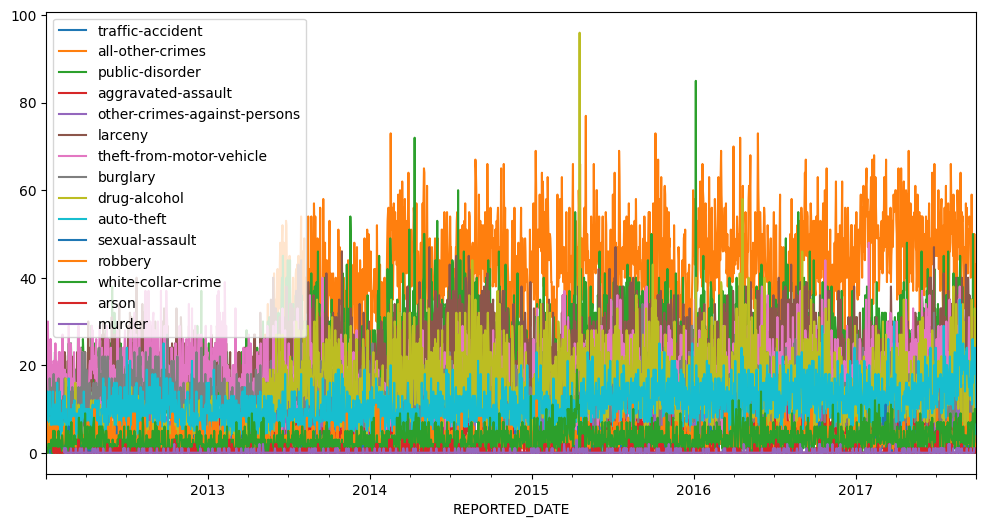

In [15]:
id = crime['OFFENSE_CATEGORY_ID'].unique()
category = {} 

plt.figure(figsize=(12, 6))

for i in id:
    df = crime.query("OFFENSE_CATEGORY_ID == @i")
    crime_counts = df['IS_CRIME'].resample('D').sum()
    category[i] = crime_counts  
    crime_counts.plot(label=i)

plt.legend()
plt.show()

- 범죄 ID별로 발생횟수 합 시계열을 그려보았다.
- 겹쳐 보이므로 알아보기 쉽게 따로 시계열을 다시 그려보았다.


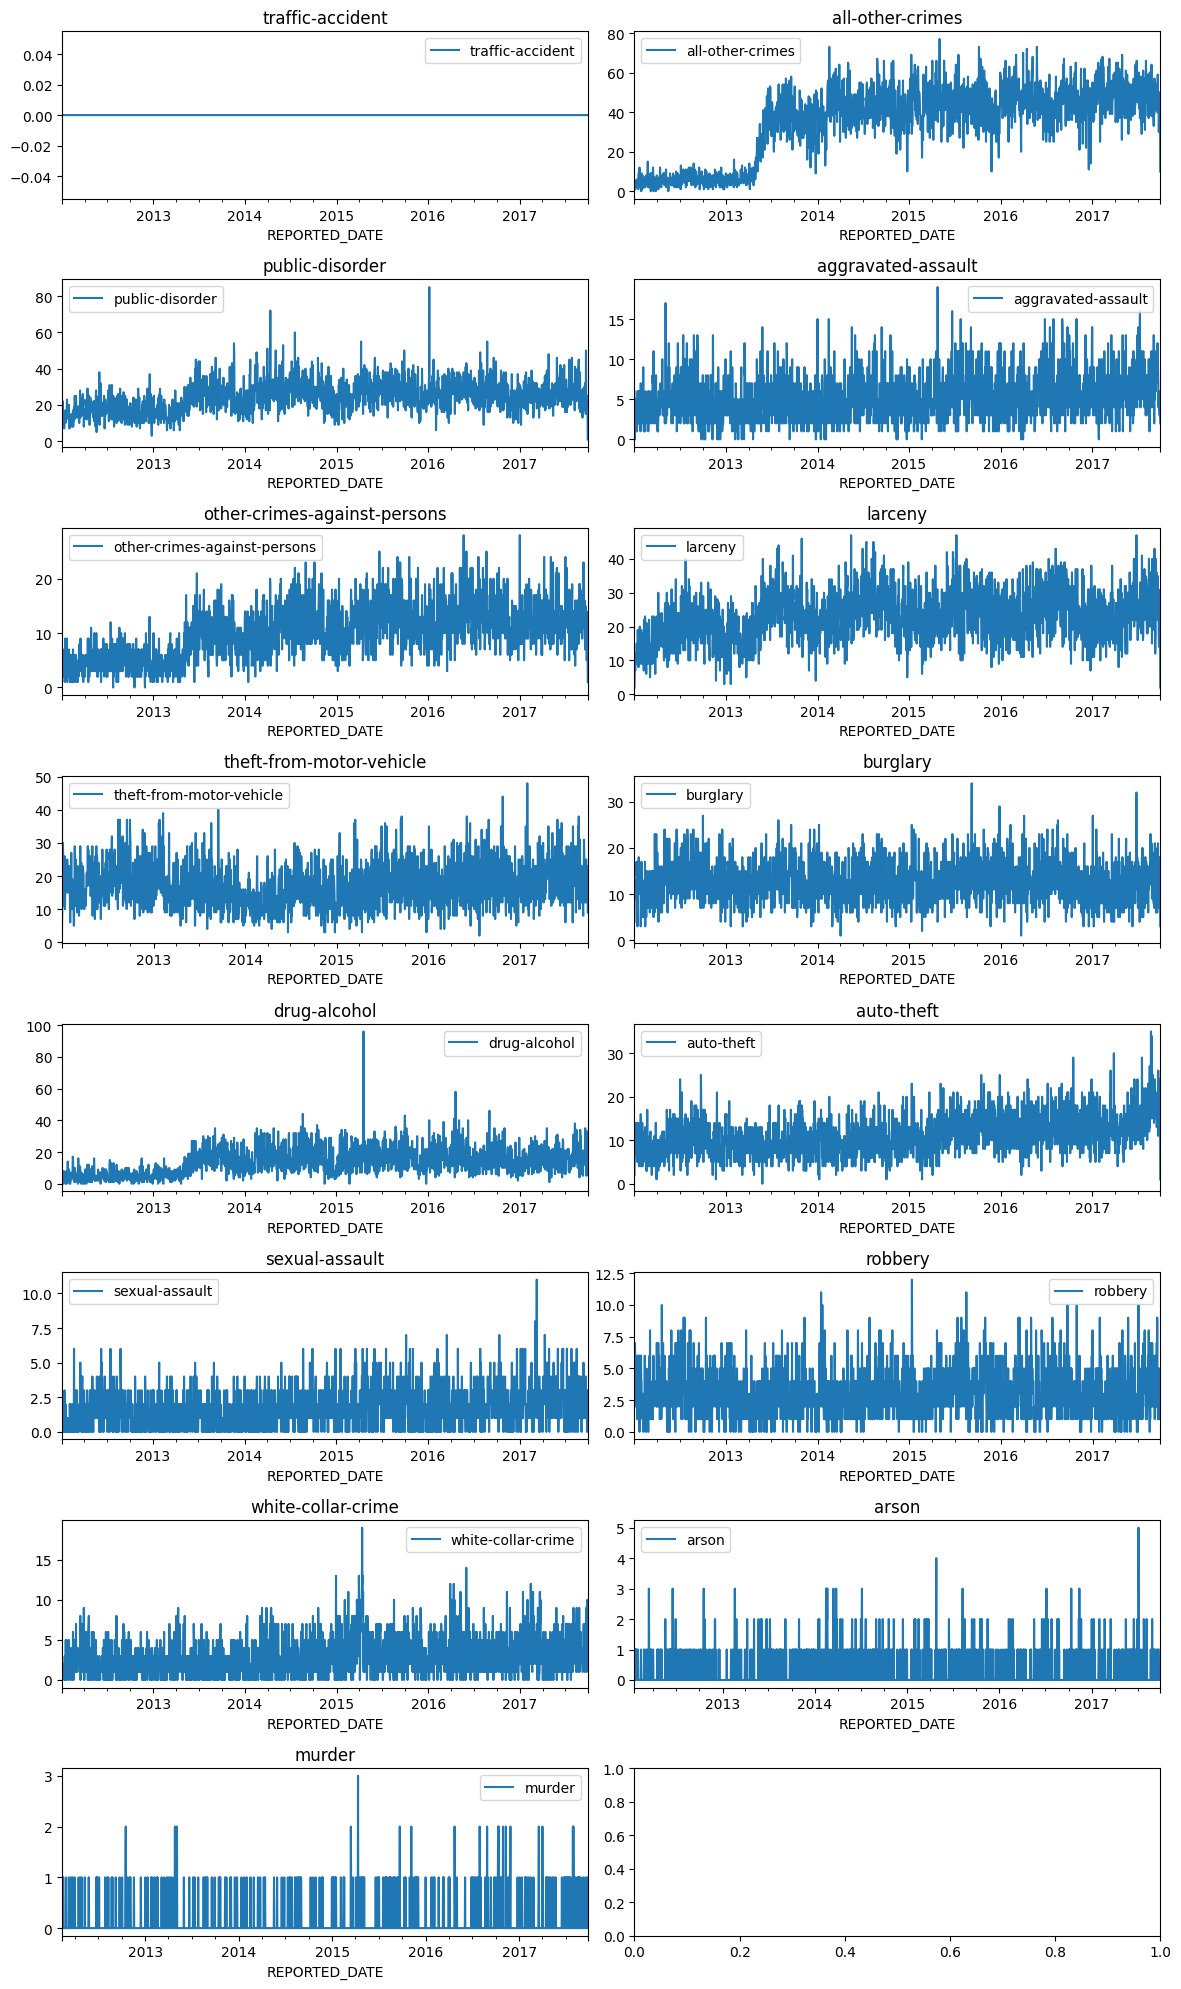

In [19]:
id = crime['OFFENSE_CATEGORY_ID'].unique()
crime_category = {}  

num_categories = len(id)
num_cols = 2  
num_rows = (num_categories + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 20))

for i, category in enumerate(id):
    df = crime.query("OFFENSE_CATEGORY_ID == @category")
    crime_counts = df['IS_CRIME'].resample('D').sum()
    crime_category[category] = crime_counts

    ax = axes[i // num_cols, i % num_cols]
    crime_counts.plot(ax=ax, label=category)
    ax.set_title(category)
    ax.legend()

plt.tight_layout()
plt.show()


- 계절적 변동이 뚜렷한 larceny에 대해 분석해본다:

- 7,8월에 뚜렷하게 높은 발생률이 확인된다.

- 전체적인 추세는 없거나 미세하게 높아지는 것으로 확인된다.